
## <BR>表210-06101 : 勞動人口、就業人口、失業人口及就業不足人口的統計數字 [繁體中文]
### <BR>Table 210-06101 : Statistics on labour force, employment, unemployment and underemployment [English]
Info URL: https://data.gov.hk/en-data/dataset/hk-censtatd-tablechart-210-06101
<BR>https://www.censtatd.gov.hk/en/web_table.html?id=210-06101
<BR>https://www.censtatd.gov.hk/datagovhk/WT_data_dict_en.pdf
<BR>JSON link: https://www.censtatd.gov.hk/api/get.php?id=210-06101&lang=en&full_series=1

In [16]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://www.censtatd.gov.hk/api/get.php?id=210-06101&lang=en&full_series=1'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}    
try:
    response = requests.get(url, headers=headers)
    if response.status_code==200 : print('Connect successfully!')
    data = response.json()
except Exception as e:
    print(e)  

Connect successfully!


In [17]:
df = pd.DataFrame(data['dataSet'])
df

,SEX,SEXDesc,freq,period,sv,svDesc,figure,sd_value
0,,Total,Y,1985,LF,No. ('000),2626.9,
1,F,Female,Y,1985,LF,No. ('000),955.4,
2,M,Male,Y,1985,LF,No. ('000),1671.5,
3,,Total,M3M,198510,LF,No. ('000),,N.A.
4,F,Female,M3M,198510,LF,No. ('000),,N.A.
...,...,...,...,...,...,...,...,...
13145,F,Female,M3M,202507,EM,No. ('000),1896.8,
13146,M,Male,M3M,202507,EM,No. ('000),1774.5,
13147,,Total,M3M,202508,EM,No. ('000),3680.6,p
13148,F,Female,M3M,202508,EM,No. ('000),1901.4,p


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13150 entries, 0 to 13149
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SEX       13150 non-null  object
 1   SEXDesc   13150 non-null  object
 2   freq      13150 non-null  object
 3   period    13150 non-null  object
 4   sv        13150 non-null  object
 5   svDesc    13150 non-null  object
 6   figure    13150 non-null  object
 7   sd_value  13150 non-null  object
dtypes: object(8)
memory usage: 822.0+ KB


In [20]:
df.describe(include='all')

,SEX,SEXDesc,freq,period,sv,svDesc,figure,sd_value
count,13150,13150,13150,13150,13150,13150,13150,13150
unique,3,3,2,526,8,3,3836,4
top,,Total,M3M,1985,LF,No. ('000),,
freq,4734,4734,12150,25,3156,6312,1739,11386


In [5]:
df

,SEX,SEXDesc,freq,period,sv,svDesc,figure,sd_value
0,,Total,Y,1985,LF,No. ('000),2626.9,
1,F,Female,Y,1985,LF,No. ('000),955.4,
2,M,Male,Y,1985,LF,No. ('000),1671.5,
3,,Total,M3M,198510,LF,No. ('000),,N.A.
4,F,Female,M3M,198510,LF,No. ('000),,N.A.
...,...,...,...,...,...,...,...,...
13145,F,Female,M3M,202507,EM,No. ('000),1896.8,
13146,M,Male,M3M,202507,EM,No. ('000),1774.5,
13147,,Total,M3M,202508,EM,No. ('000),3680.6,p
13148,F,Female,M3M,202508,EM,No. ('000),1901.4,p


In [46]:
temp = df.loc[ (df.freq=='Y')&(df.SEXDesc=='Total')&(df.sv=='UR')
                ].reset_index(drop=True)
temp['period'] = pd.to_datetime(temp.period, format='%Y')
temp = temp.set_index('period', drop=True)

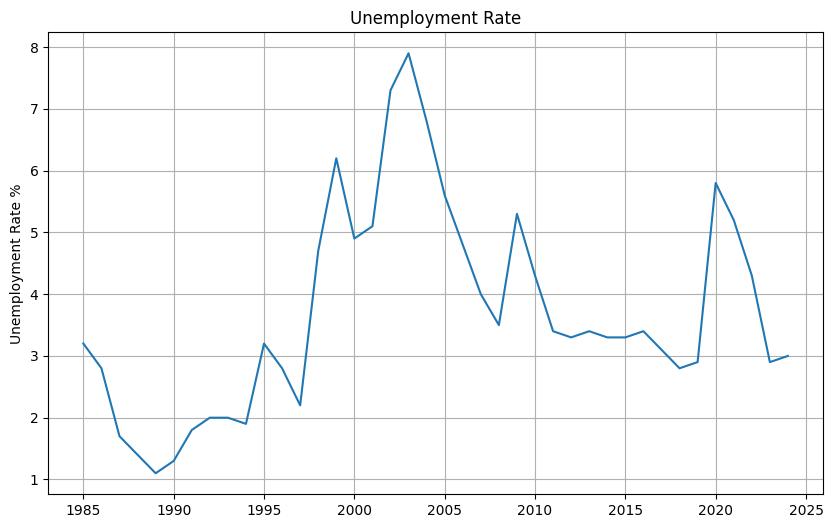

In [50]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(temp.index, temp.figure.astype(float))
ax.set_ylabel('Unemployment Rate %')
ax.grid(True)
plt.title('Unemployment Rate')
plt.show()